In [26]:
#etherum fraud detection
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
dataset = pd.read_csv("../input/ethereum-fraud-detection/transaction_dataset.csv",sep=",")
dataset = dataset.iloc[:,2:]
dataset.columns = dataset.columns.str.replace(' ', '')

length 9816
length 468
length 306


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


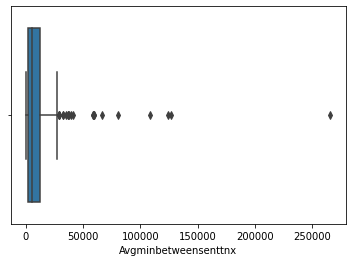

In [27]:
#checking if we can group
from collections import Counter
len(Counter(dataset.Address))
def counts (data):
    counts = Counter(data)
    print("length",len(counts))
counts(dataset.Address)
counts(dataset.ERC20_most_rec_token_type)
counts(dataset.ERC20mostsenttokentype)
d =dataset.groupby(dataset.ERC20mostsenttokentype).mean()
X = d.iloc[:,1:]
y =  d["FLAG"]
y = np.round(y).astype(int)
y.groupby(y).size()
#Class imbalance issue
X.isna().any()
def outlier_dec(data):
    sns.boxplot(data)
    
outlier_dec(X.Avgminbetweensenttnx)
#----------------------------------------------------------
# Create correlation matrix
corr_matrix = X.corr().abs()
#------Remove the highly correlated variables----------------------
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
# Drop features 
X.drop(to_drop, axis=1, inplace=True)
#Drop columns that have 1 unique value -------------------------
X.loc[:,X.nunique()!=1]
X.drop(columns=X.columns[X.nunique()==1], inplace=True)
X = X.values
#----------------------------
def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    binary = np.array(cm)
    fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
    plt.show()
    print("Confusion Matrix \n", cm)
    print('Balanced Accuracy ',metrics.balanced_accuracy_score(y_test,y_pred))
    print("Recall Accuracy Score~TP",metrics.recall_score(y_test, y_pred))
    print("Precision Score ~ Ratio of TP",metrics.precision_score(y_test, y_pred))
    print("F1 Score",metrics.f1_score(y_test, y_pred))
    print("auc_roc score", metrics.roc_auc_score(y_test,y_pred))
    print("Classification Report \n", classification_report(y_test,y_pred))
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    
    
def cross_validation(model,X_train,y_train,n):
    kfold = KFold(n_splits=10)  
    accuracies = cross_val_score(model,X= X_train,y= y_train,cv = kfold,scoring='accuracy')
    print("Standard Deviation",accuracies.std())
    print("Mean/Avergae Score",accuracies.mean())
#----------------------------
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

knn--------------------------------------------


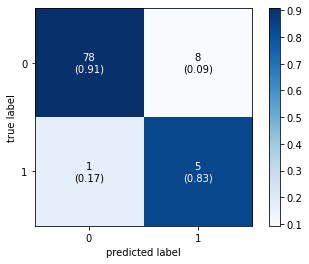

Confusion Matrix 
 [[78  8]
 [ 1  5]]
Balanced Accuracy  0.8701550387596899
Recall Accuracy Score~TP 0.8333333333333334
Precision Score ~ Ratio of TP 0.38461538461538464
F1 Score 0.5263157894736842
auc_roc score 0.87015503875969
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95        86
           1       0.38      0.83      0.53         6

    accuracy                           0.90        92
   macro avg       0.69      0.87      0.74        92
weighted avg       0.95      0.90      0.92        92



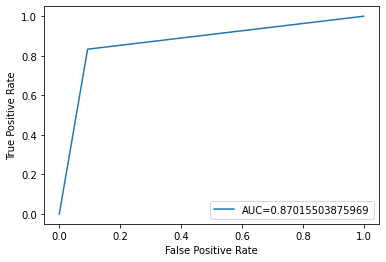

Standard Deviation 0.0828642557799526
Mean/Avergae Score 0.8911255411255412
mlp--------------------------------------------


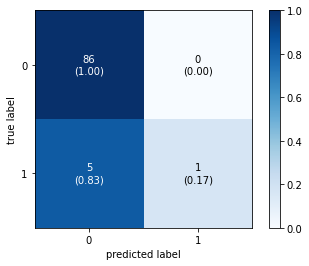

Confusion Matrix 
 [[86  0]
 [ 5  1]]
Balanced Accuracy  0.5833333333333334
Recall Accuracy Score~TP 0.16666666666666666
Precision Score ~ Ratio of TP 1.0
F1 Score 0.2857142857142857
auc_roc score 0.5833333333333334
Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        86
           1       1.00      0.17      0.29         6

    accuracy                           0.95        92
   macro avg       0.97      0.58      0.63        92
weighted avg       0.95      0.95      0.93        92



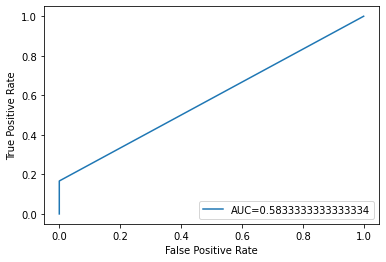

Standard Deviation 0.08737620986393531
Mean/Avergae Score 0.8683982683982683
Ada--------------------------------------------


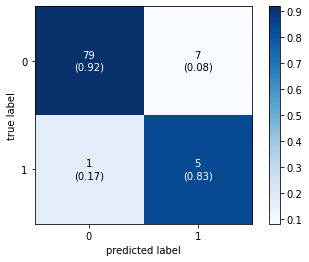

Confusion Matrix 
 [[79  7]
 [ 1  5]]
Balanced Accuracy  0.875968992248062
Recall Accuracy Score~TP 0.8333333333333334
Precision Score ~ Ratio of TP 0.4166666666666667
F1 Score 0.5555555555555556
auc_roc score 0.875968992248062
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        86
           1       0.42      0.83      0.56         6

    accuracy                           0.91        92
   macro avg       0.70      0.88      0.75        92
weighted avg       0.95      0.91      0.93        92



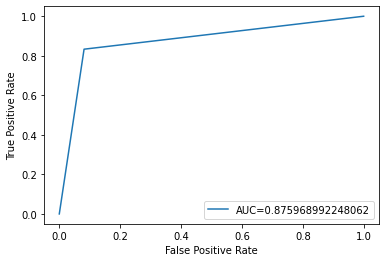

Standard Deviation 0.07215328275684842
Mean/Avergae Score 0.9106060606060605
RandomForest--------------------------------------------


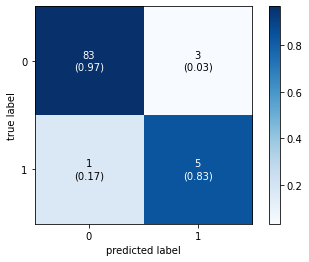

Confusion Matrix 
 [[83  3]
 [ 1  5]]
Balanced Accuracy  0.8992248062015504
Recall Accuracy Score~TP 0.8333333333333334
Precision Score ~ Ratio of TP 0.625
F1 Score 0.7142857142857143
auc_roc score 0.8992248062015505
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.62      0.83      0.71         6

    accuracy                           0.96        92
   macro avg       0.81      0.90      0.85        92
weighted avg       0.96      0.96      0.96        92



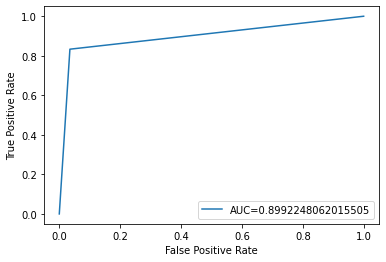

Standard Deviation 0.04599758081087269
Mean/Avergae Score 0.9155844155844155
SVC--------------------------------------------


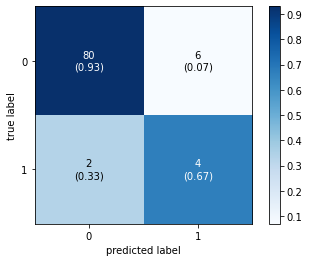

Confusion Matrix 
 [[80  6]
 [ 2  4]]
Balanced Accuracy  0.7984496124031008
Recall Accuracy Score~TP 0.6666666666666666
Precision Score ~ Ratio of TP 0.4
F1 Score 0.5
auc_roc score 0.7984496124031008
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        86
           1       0.40      0.67      0.50         6

    accuracy                           0.91        92
   macro avg       0.69      0.80      0.73        92
weighted avg       0.94      0.91      0.92        92



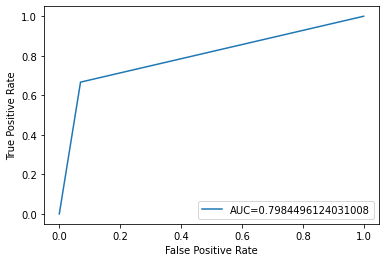

Standard Deviation 0.06318567027019546
Mean/Avergae Score 0.864069264069264
GaussianNB--------------------------------------------


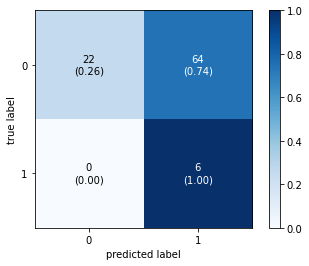

Confusion Matrix 
 [[22 64]
 [ 0  6]]
Balanced Accuracy  0.627906976744186
Recall Accuracy Score~TP 1.0
Precision Score ~ Ratio of TP 0.08571428571428572
F1 Score 0.15789473684210528
auc_roc score 0.627906976744186
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.26      0.41        86
           1       0.09      1.00      0.16         6

    accuracy                           0.30        92
   macro avg       0.54      0.63      0.28        92
weighted avg       0.94      0.30      0.39        92



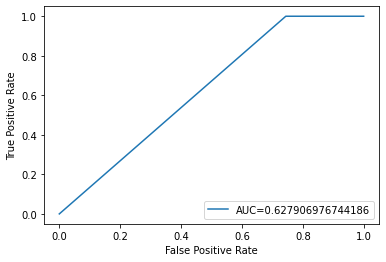

Standard Deviation 0.12170585898393474
Mean/Avergae Score 0.38961038961038963
LogisticRegression--------------------------------------------


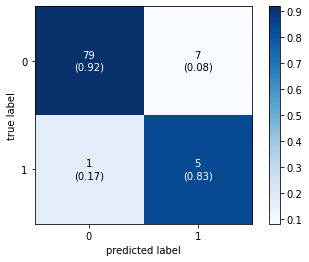

Confusion Matrix 
 [[79  7]
 [ 1  5]]
Balanced Accuracy  0.875968992248062
Recall Accuracy Score~TP 0.8333333333333334
Precision Score ~ Ratio of TP 0.4166666666666667
F1 Score 0.5555555555555556
auc_roc score 0.875968992248062
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        86
           1       0.42      0.83      0.56         6

    accuracy                           0.91        92
   macro avg       0.70      0.88      0.75        92
weighted avg       0.95      0.91      0.93        92



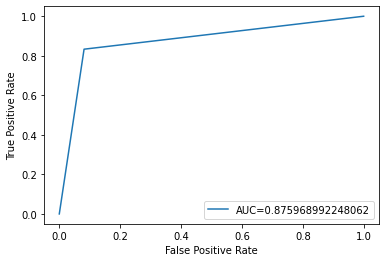

Standard Deviation 0.08621160766438393
Mean/Avergae Score 0.8772727272727272
DecisionTree--------------------------------------------


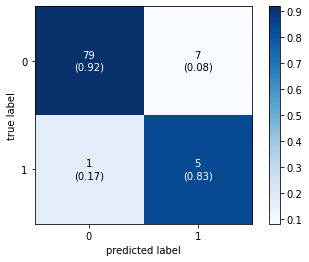

Confusion Matrix 
 [[79  7]
 [ 1  5]]
Balanced Accuracy  0.875968992248062
Recall Accuracy Score~TP 0.8333333333333334
Precision Score ~ Ratio of TP 0.4166666666666667
F1 Score 0.5555555555555556
auc_roc score 0.875968992248062
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        86
           1       0.42      0.83      0.56         6

    accuracy                           0.91        92
   macro avg       0.70      0.88      0.75        92
weighted avg       0.95      0.91      0.93        92



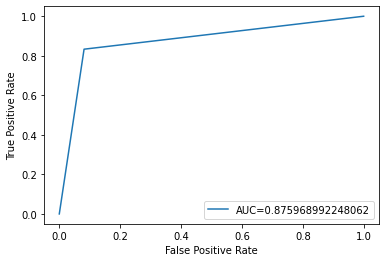

Standard Deviation 0.10127372319419171
Mean/Avergae Score 0.8632034632034632


In [28]:
#knn 
print ("knn--------------------------------------------")
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred= knn_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(knn_model,X_train,y_train,10)


#mlp
print ("mlp--------------------------------------------")
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(5,2),max_iter = 5000,activation = 'relu',solver = 'adam')
mlp_model.fit(X_train,y_train)
y_pred= mlp_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(mlp_model,X_train,y_train,10)


#Ada
print ("Ada--------------------------------------------")
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada_model.fit(X_train,y_train)
y_pred= ada_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(ada_model,X_train,y_train,10)


#RandomForest
print ("RandomForest--------------------------------------------")
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(n_estimators = 100)
random_model.fit(X_train,y_train)
y_pred= random_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(random_model,X_train,y_train,10)


#SVC
print ("SVC--------------------------------------------")
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear', random_state=1, C=0.1)
SVC_model.fit(X_train,y_train)
y_pred= SVC_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(SVC_model,X_train,y_train,10)

#GaussianNB
print ("GaussianNB--------------------------------------------")
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)
y_pred= NB_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(NB_model,X_train,y_train,10)

#LogisticRegression
print ("LogisticRegression--------------------------------------------")
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression(random_state=0) 
Logistic_model.fit(X_train,y_train)
y_pred= Logistic_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(Logistic_model,X_train,y_train,10)

#DecisionTree
print ("DecisionTree--------------------------------------------")
from sklearn.tree import DecisionTreeClassifier
DecisionTree_model = DecisionTreeClassifier(criterion='entropy', random_state=0) 
DecisionTree_model.fit(X_train,y_train)
y_pred= DecisionTree_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(DecisionTree_model,X_train,y_train,10)


Epoch 1/150
7/7 [==============================] - 1s 2ms/step - loss: 0.6151 - accuracy: 0.8216
Epoch 2/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.8216
Epoch 3/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.8216
Epoch 4/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.8216
Epoch 5/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8216
Epoch 6/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.8216
Epoch 7/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.8216
Epoch 8/150
7/7 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8216
Epoch 9/150
7/7 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8216
Epoch 10/150
7/7 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.8216
Epoch 11/150
7/7 [===========

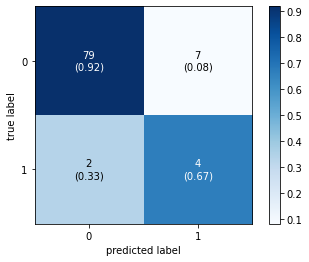

Confusion Matrix 
 [[79  7]
 [ 2  4]]
Balanced Accuracy  0.7926356589147286
Recall Accuracy Score~TP 0.6666666666666666
Precision Score ~ Ratio of TP 0.36363636363636365
F1 Score 0.4705882352941177
auc_roc score 0.7926356589147286
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        86
           1       0.36      0.67      0.47         6

    accuracy                           0.90        92
   macro avg       0.67      0.79      0.71        92
weighted avg       0.94      0.90      0.92        92



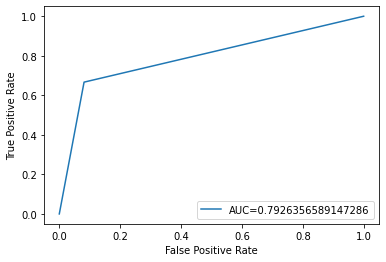

Accuracy Score 0.9021739130434783


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

nn_model = Sequential()
nn_model.add(Dense(8,input_dim = len(X[0,:]),activation= 'relu'))
nn_model.add(Dense(8,activation= 'relu'))
nn_model.add(Dense(1,activation= 'sigmoid'))

nn_model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
nn_model.fit(x = X_train,y = y_train,epochs = 150,verbose = 1)
y_pred= nn_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred.round())
Accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy Score",Accuracy)

/opt/conda/lib/python3.7/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


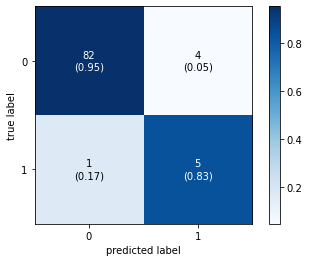

Confusion Matrix 
 [[82  4]
 [ 1  5]]
Balanced Accuracy  0.8934108527131783
Recall Accuracy Score~TP 0.8333333333333334
Precision Score ~ Ratio of TP 0.5555555555555556
F1 Score 0.6666666666666667
auc_roc score 0.8934108527131784
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.56      0.83      0.67         6

    accuracy                           0.95        92
   macro avg       0.77      0.89      0.82        92
weighted avg       0.96      0.95      0.95        92



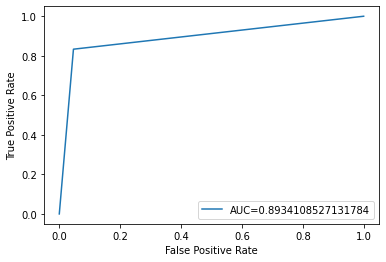

Accuracy Score 0.9456521739130435


In [33]:
from mlxtend.classifier import EnsembleVoteClassifier

clfs = [random_model,ada_model]

model_clfs = EnsembleVoteClassifier(clfs = clfs, 
                                     voting = 'soft', 
                                     weights = [2,1], 
                                     fit_base_estimators = False
                                    ).fit(X_train,y_train)

y_pred = model_clfs.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred.round())
Accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy Score",Accuracy)